In [51]:
from Lib.lib_graphe import Graphe
from Lib.lib_graphe import bellman_ford,_fluidification,_ralentissement,_travaux,chemin_ralentissement,chemin_fluidification,chemin_travaux,carte_graphe,bellman_ford_2,afficher_distances


In [52]:
import json

# Chemin vers le fichier JSON contenant le graphe
chemin_fichier_json = (r"C:\Users\zineb\Downloads\Eval (3)\graphe.json")

# Chargement du graphe depuis le fichier JSON
with open(chemin_fichier_json, "r") as f:
    data = json.load(f)

# Création de l'objet Graphe à partir des données JSON chargées
Ex_graphe = Graphe(
    sommets=data["Ex_graphe"]["sommets"],
    arretes=data["Ex_graphe"]["arretes"]
)


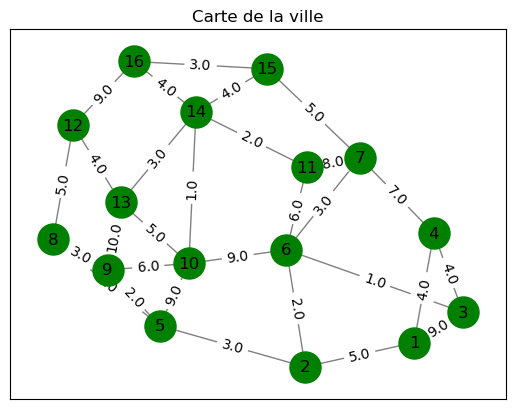

In [53]:
# on aoute les arrêtes pour le sens inverses
arretes_bidirectionnelles = []
for depart, arrivee, poids in Ex_graphe.arretes:
    arretes_bidirectionnelles.append((depart, arrivee, poids))
    arretes_bidirectionnelles.append((arrivee, depart, poids))

Ex_graphe.arretes.extend(arretes_bidirectionnelles)

carte_graphe(Ex_graphe)

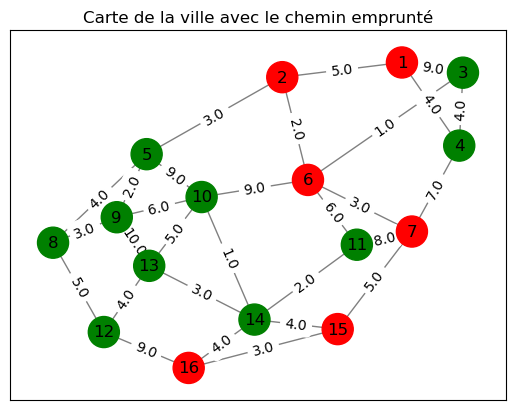

In [54]:
# J'affiche le graphe avec un chemin entre les emplacements 1 et 16 mais tjrs avec la fonction bellman_ford
chemin = bellman_ford(Ex_graphe, "1", "16")
carte_graphe(Ex_graphe, chemin=chemin)

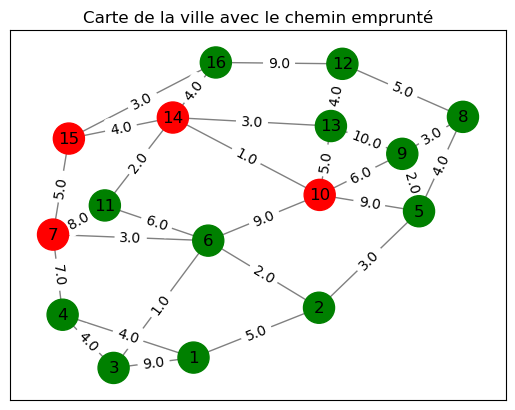

In [55]:
r = bellman_ford(Ex_graphe, "7", "10")
carte_graphe(Ex_graphe, r)

In [56]:
C=bellman_ford(Ex_graphe,"1","16")

In [57]:
C['chemins']

[['1', '2', '6', '7', '15', '16']]

In [58]:
A= _ralentissement(Ex_graphe,"9","13",3.0)
print(A)


Graphe(sommets=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'], arretes=[('1', '2', 5.0), ('1', '3', 9.0), ('1', '4', 4.0), ('2', '5', 3.0), ('2', '6', 2.0), ('3', '4', 4.0), ('3', '6', 1.0), ('4', '7', 7.0), ('5', '8', 4.0), ('5', '9', 2.0), ('5', '10', 9.0), ('6', '7', 3.0), ('6', '10', 9.0), ('6', '11', 6.0), ('7', '11', 8.0), ('7', '15', 5.0), ('8', '12', 5.0), ('9', '8', 3.0), ('9', '13', 13.0), ('10', '9', 6.0), ('10', '13', 5.0), ('10', '14', 1.0), ('11', '14', 2.0), ('12', '16', 9.0), ('13', '12', 4.0), ('13', '14', 3.0), ('14', '16', 4.0), ('15', '14', 4.0), ('15', '16', 3.0), ('1', '2', 5.0), ('2', '1', 5.0), ('1', '3', 9.0), ('3', '1', 9.0), ('1', '4', 4.0), ('4', '1', 4.0), ('2', '5', 3.0), ('5', '2', 3.0), ('2', '6', 2.0), ('6', '2', 2.0), ('3', '4', 4.0), ('4', '3', 4.0), ('3', '6', 1.0), ('6', '3', 1.0), ('4', '7', 7.0), ('7', '4', 7.0), ('5', '8', 4.0), ('8', '5', 4.0), ('5', '9', 2.0), ('9', '5', 2.0), ('5', '10', 9.0), ('10', '5

In [59]:
bellman_ford(Ex_graphe,"5","13")

{'distance': 12.0, 'chemins': [['5', '9', '13'], ['5', '9', '10', '14', '13']]}

In [60]:
bellman_ford(A,"5","13")

{'distance': 12.0, 'chemins': [['5', '9', '10', '14', '13']]}

In [61]:
chemin_ralentissement(Ex_graphe,"5","13","9","13",3.0)

{'distance': 12.0, 'chemins': [['5', '9', '10', '14', '13']]}

In [62]:
ralentissement_7min = bellman_ford(A, "9", "13")
ralentissement_7min

{'distance': 10.0, 'chemins': [['9', '10', '14', '13']]}

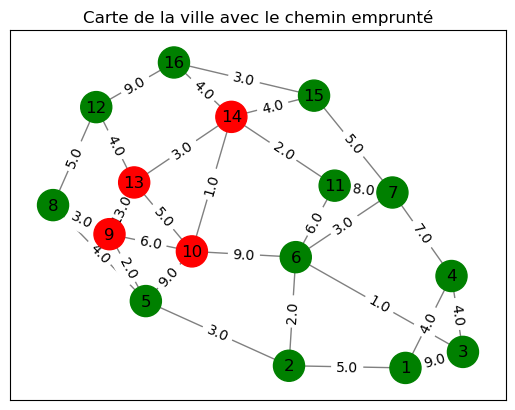

In [63]:
carte_graphe(A, ralentissement_7min)

In [64]:
B = _fluidification(Ex_graphe,"9","13",3.0)
print(B)

Graphe(sommets=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'], arretes=[('1', '2', 5.0), ('1', '3', 9.0), ('1', '4', 4.0), ('2', '5', 3.0), ('2', '6', 2.0), ('3', '4', 4.0), ('3', '6', 1.0), ('4', '7', 7.0), ('5', '8', 4.0), ('5', '9', 2.0), ('5', '10', 9.0), ('6', '7', 3.0), ('6', '10', 9.0), ('6', '11', 6.0), ('7', '11', 8.0), ('7', '15', 5.0), ('8', '12', 5.0), ('9', '8', 3.0), ('9', '13', 7.0), ('10', '9', 6.0), ('10', '13', 5.0), ('10', '14', 1.0), ('11', '14', 2.0), ('12', '16', 9.0), ('13', '12', 4.0), ('13', '14', 3.0), ('14', '16', 4.0), ('15', '14', 4.0), ('15', '16', 3.0), ('1', '2', 5.0), ('2', '1', 5.0), ('1', '3', 9.0), ('3', '1', 9.0), ('1', '4', 4.0), ('4', '1', 4.0), ('2', '5', 3.0), ('5', '2', 3.0), ('2', '6', 2.0), ('6', '2', 2.0), ('3', '4', 4.0), ('4', '3', 4.0), ('3', '6', 1.0), ('6', '3', 1.0), ('4', '7', 7.0), ('7', '4', 7.0), ('5', '8', 4.0), ('8', '5', 4.0), ('5', '9', 2.0), ('9', '5', 2.0), ('5', '10', 9.0), ('10', '5'

In [65]:
bellman_ford(Ex_graphe,"5","13")

{'distance': 12.0, 'chemins': [['5', '9', '13'], ['5', '9', '10', '14', '13']]}

In [66]:
bellman_ford(B,"5","13")

{'distance': 9.0, 'chemins': [['5', '9', '13']]}

In [67]:
len(Ex_graphe.arretes)

87

In [68]:
T=_travaux(Ex_graphe,["3","5","7","9","11"])
print(T)

Graphe(sommets=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'], arretes=[('1', '2', 5.0), ('1', '3', 10.0), ('1', '4', 4.0), ('2', '5', 4.0), ('2', '6', 2.0), ('3', '4', 5.0), ('3', '6', 2.0), ('4', '7', 8.0), ('5', '8', 5.0), ('5', '9', 3.0), ('5', '10', 10.0), ('6', '7', 4.0), ('6', '10', 9.0), ('6', '11', 7.0), ('7', '11', 9.0), ('7', '15', 6.0), ('8', '12', 5.0), ('9', '8', 4.0), ('9', '13', 11.0), ('10', '9', 7.0), ('10', '13', 5.0), ('10', '14', 1.0), ('11', '14', 3.0), ('12', '16', 9.0), ('13', '12', 4.0), ('13', '14', 3.0), ('14', '16', 4.0), ('15', '14', 4.0), ('15', '16', 3.0), ('1', '2', 5.0), ('2', '1', 5.0), ('1', '3', 10.0), ('3', '1', 10.0), ('1', '4', 4.0), ('4', '1', 4.0), ('2', '5', 4.0), ('5', '2', 4.0), ('2', '6', 2.0), ('6', '2', 2.0), ('3', '4', 5.0), ('4', '3', 5.0), ('3', '6', 2.0), ('6', '3', 2.0), ('4', '7', 8.0), ('7', '4', 8.0), ('5', '8', 5.0), ('8', '5', 5.0), ('5', '9', 3.0), ('9', '5', 3.0), ('5', '10', 10.0), ('10

In [69]:
bellman_ford(T,"1","16")

{'distance': 20.0, 'chemins': [['1', '2', '6', '7', '15', '16']]}

In [70]:
chemin_travaux(Ex_graphe,"1","16",["3","5","7","9","11"])

{'distance': 20.0, 'chemins': [['1', '2', '6', '7', '15', '16']]}

In [71]:
travaux_1_16=bellman_ford(T,"1","16")

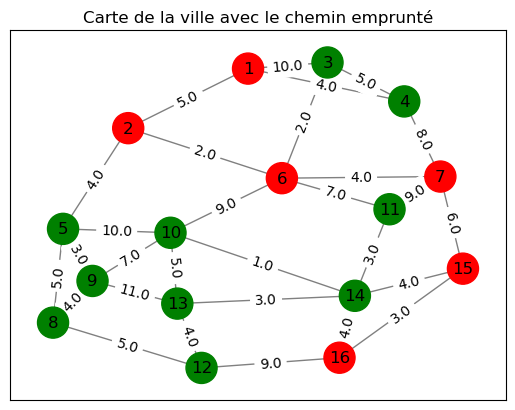

In [72]:
carte_graphe(T, travaux_1_16)
    

In [73]:
bellman_ford_2(Ex_graphe)

{'1': {'1': 0,
  '2': 5.0,
  '3': 8.0,
  '4': 4.0,
  '5': 8.0,
  '6': 7.0,
  '7': 10.0,
  '8': 12.0,
  '9': 10.0,
  '10': 16.0,
  '11': 13.0,
  '12': 17.0,
  '13': 18.0,
  '14': 15.0,
  '15': 15.0,
  '16': 18.0},
 '2': {'1': 5.0,
  '2': 0,
  '3': 3.0,
  '4': 7.0,
  '5': 3.0,
  '6': 2.0,
  '7': 5.0,
  '8': 7.0,
  '9': 5.0,
  '10': 11.0,
  '11': 8.0,
  '12': 12.0,
  '13': 13.0,
  '14': 10.0,
  '15': 10.0,
  '16': 13.0},
 '3': {'1': 8.0,
  '2': 3.0,
  '3': 0,
  '4': 4.0,
  '5': 6.0,
  '6': 1.0,
  '7': 4.0,
  '8': 10.0,
  '9': 8.0,
  '10': 10.0,
  '11': 7.0,
  '12': 15.0,
  '13': 12.0,
  '14': 9.0,
  '15': 9.0,
  '16': 12.0},
 '4': {'1': 4.0,
  '2': 7.0,
  '3': 4.0,
  '4': 0,
  '5': 10.0,
  '6': 5.0,
  '7': 7.0,
  '8': 14.0,
  '9': 12.0,
  '10': 14.0,
  '11': 11.0,
  '12': 19.0,
  '13': 16.0,
  '14': 13.0,
  '15': 12.0,
  '16': 15.0},
 '5': {'1': 8.0,
  '2': 3.0,
  '3': 6.0,
  '4': 10.0,
  '5': 0,
  '6': 5.0,
  '7': 8.0,
  '8': 4.0,
  '9': 2.0,
  '10': 8.0,
  '11': 11.0,
  '12': 9.0,
  '13

In [74]:
distances = bellman_ford_2(Ex_graphe)
afficher_distances(distances)

+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+
|    |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |
+====+=====+=====+=====+=====+=====+=====+=====+=====+=====+======+======+======+======+======+======+======+
|  1 |   0 |   5 |   8 |   4 |   8 |   7 |  10 |  12 |  10 |   16 |   13 |   17 |   18 |   15 |   15 |   18 |
+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+
|  2 |   5 |   0 |   3 |   7 |   3 |   2 |   5 |   7 |   5 |   11 |    8 |   12 |   13 |   10 |   10 |   13 |
+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+
|  3 |   8 |   3 |   0 |   4 |   6 |   1 |   4 |  10 |   8 |   10 |    7 |   15 |   12 |    9 |    9 |   12 |
+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+
|  4 |   4

In [75]:
distance_travaux = bellman_ford_2(_travaux(Ex_graphe,["3","5","7","9","11"] ))
afficher_distances(distance_travaux)

+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+
|    |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |
+====+=====+=====+=====+=====+=====+=====+=====+=====+=====+======+======+======+======+======+======+======+
|  1 |   0 |   5 |   9 |   4 |   9 |   7 |  11 |  14 |  12 |   16 |   14 |   19 |   20 |   17 |   17 |   20 |
+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+
|  2 |   5 |   0 |   4 |   9 |   4 |   2 |   6 |   9 |   7 |   11 |    9 |   14 |   15 |   12 |   12 |   15 |
+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+
|  3 |   9 |   4 |   0 |   5 |   8 |   2 |   6 |  13 |  11 |   11 |    9 |   18 |   15 |   12 |   12 |   15 |
+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+
|  4 |   4

In [76]:
chemin_ralentissement(Ex_graphe,"1","16","1","2",2.0)

{'distance': 19.0, 'chemins': [['1', '4', '7', '15', '16']]}